<a href="https://colab.research.google.com/github/allanbraquiel/Dados-Sobre-Diabetes/blob/master/Dados_Sobre_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dados sobre diabetes**

O conjunto de dados de Diabetes das Índias Pima do Arizona nos EUA, foi desenvolvida pelo National Institute of Diabetes and Digestive and Kidney Diseases e cedida em 1990 ao repositório da Universidade da Califórnia, Irvine. O conjunto de dados descreve 768 pacientes do género feminino com idades entre 21 e 81 anos, divididos em 500 casos que não padecem de Diabetes Mellitus e o restante sim. 

O conjunto de dados tem 9 atributos:
1. Pregnancies - nº de gravidezes;
2. Glucose - Plasma do Teste Oral de Tolerância à Glicose de 2 horas;
3. Blood Pressure - Pressão sangúinea;
4. Skin Thickness - Espessura da dobra cutânea tricipital (espessura da pele);
5. Insulin - Nível de Insulina em soro de 2 horas;
6. BMI - Índice de Massa Corporal;
7. DiabetesPedigreeFunction - Função de linhagem de diabetes, valores que medem a tendência ao desenvolvimento de diabetes;
8. Age - Idade;
9. Outcome - Surgimento de Diabetes no espaço de 5 anos. Esta é a classe de predição e pode assumir o valor 0=não diabético e 1=diabético.

Fonte da informação: https://jreduardo.github.io/ce064-ml/work5.html

https://comum.rcaap.pt/bitstream/10400.26/18285/1/Lu%C3%ADs-Miguel-Candeias-Borges.pdf

Valores aceitáveis de Insulina em jejum: 100, em qualquer momento: 140

Os valores de referência do exame da glicose em jejum são:

Normal: inferior a 99 mg/dL;

Pré-diabetes: entre 100 e 125 mg/dL;

Diabetes: superior a 126 mg/dL em dois dias diferentes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Biblioteca do Plotly para plotar os gráficos 
import cufflinks as cf
cf.go_offline()
import plotly
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

Para renderizar no Colab

In [2]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

Aqui definimos o tamanho da imagem a partir da biblioteca pylab

In [3]:
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 10.0)

# Análise exploratória dos dados

Carregando o dataset que está disponível em um repositório no github

In [4]:
url = "https://raw.githubusercontent.com/allanbraquiel/Dados-Sobre-Diabetes/master/diabetes.csv"

In [5]:
df = pd.read_csv(url, sep=",", encoding="utf-8")

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df = df.rename(columns={'DiabetesPedigreeFunction': 'PedigreeFunc'})

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   PedigreeFunc   768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Descrevendo todas as colunas para encontrar os valor mínimo, máximo , média e os quadrantes

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Verificando a distribuição dos dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f864f3f5f60>,
      dtype=object)

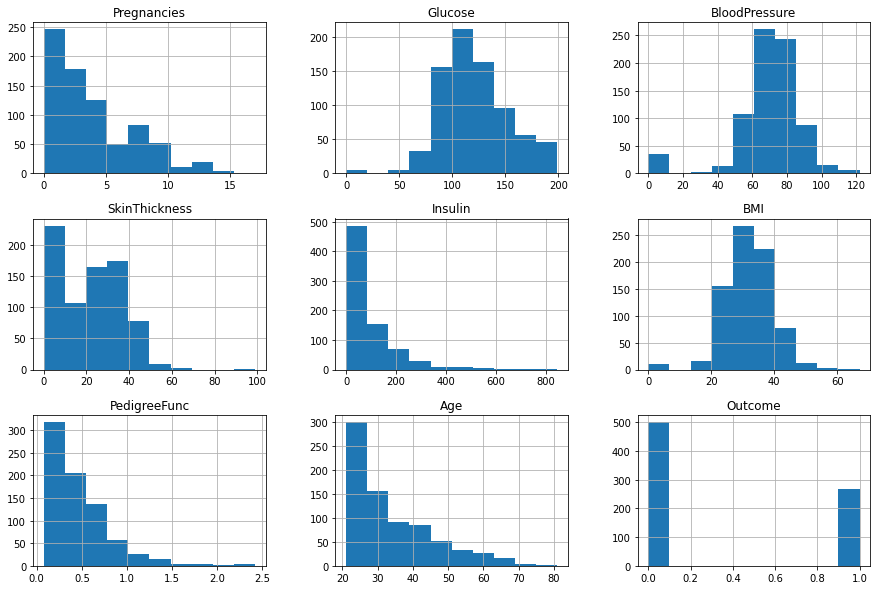

In [11]:
df.hist(bins=10)

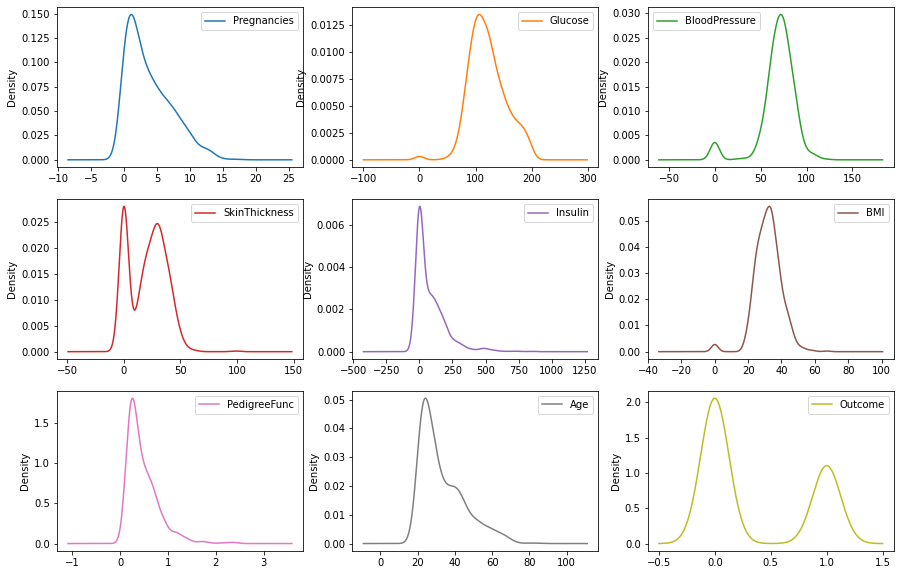

In [12]:
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

In [13]:
plt.style.use("fivethirtyeight")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

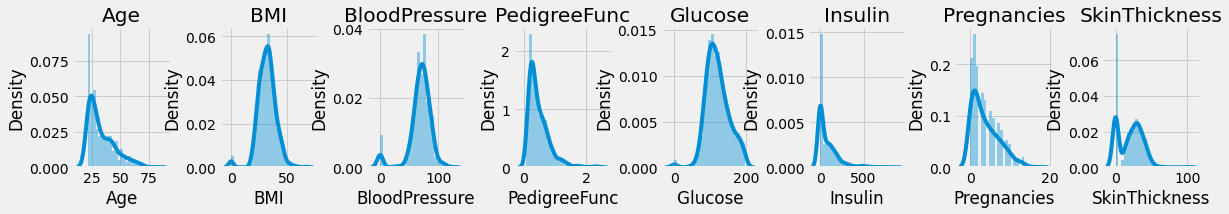

In [14]:
plt.figure(1, figsize=(18, 6))
n = 0
for x in ["Age", "BMI", "BloodPressure", "PedigreeFunc", "Glucose", "Insulin", "Pregnancies", "SkinThickness"]:
  n += 1
  plt.subplot(2, 8, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df[x], bins=25)
  plt.title(f"{x}")
plt.show()

Observamos que em algumas colunas como BloodPressure(Presão Sanguínea), Glucose (Glicose), SkinThickness (Espessura da pele), Insulin (Insulina), BMI (Indice de massa corporal), existem alguns registros com valor 0, portanto iremos substituir este valor pela média, para que não interfira do desenpenho do modelo

In [15]:
df[["BloodPressure", "Glucose", "SkinThickness", "Insulin", "BMI"]].describe()

,BloodPressure,Glucose,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,69.105469,120.894531,20.536458,79.799479,31.992578
std,19.355807,31.972618,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,99.000000,0.000000,0.000000,27.300000
50%,72.000000,117.000000,23.000000,30.500000,32.000000
75%,80.000000,140.250000,32.000000,127.250000,36.600000
max,122.000000,199.000000,99.000000,846.000000,67.100000


Substituindo o valores 0 por NAN e depois utilizando os metodos forward ou backward para substituir os valores

In [16]:
def replace_nan(dados):
  dados = dados[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)
  return dados

In [17]:
df2 = df.copy()
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df2 = replace_nan(df)
df2['Pregnancies'] = df['Pregnancies']
df2['PedigreeFunc'] = df['PedigreeFunc']
df2['Age'] = df['Age']
df2['Outcome'] = df['Outcome']
df2.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,PedigreeFunc,Age,Outcome
0,148.0,72.0,35.0,NaN,33.6,6,0.627,50,1
1,85.0,66.0,29.0,NaN,26.6,1,0.351,31,0
2,183.0,64.0,NaN,NaN,23.3,8,0.672,32,1
3,89.0,66.0,23.0,94.0,28.1,1,0.167,21,0
4,137.0,40.0,35.0,168.0,43.1,0,2.288,33,1


In [19]:
def replace_forward(dados):
  dados['Glucose'] = dados['Glucose'].fillna(method='ffill')
  dados['BloodPressure'] = dados['BloodPressure'].fillna(method='ffill')
  dados['SkinThickness'] = dados['SkinThickness'].fillna(method='ffill')
  dados['Insulin'] = dados['Insulin'].fillna(method='bfill')
  dados['Insulin'] = dados['Insulin'].fillna(method='ffill')
  dados['BMI'] = dados['BMI'].fillna(method='ffill')
  return dados

In [20]:
df3 = replace_forward(df2)

In [21]:
df3.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,PedigreeFunc,Age,Outcome
0,148.0,72.0,35.0,94.0,33.6,6,0.627,50,1
1,85.0,66.0,29.0,94.0,26.6,1,0.351,31,0
2,183.0,64.0,29.0,94.0,23.3,8,0.672,32,1
3,89.0,66.0,23.0,94.0,28.1,1,0.167,21,0
4,137.0,40.0,35.0,168.0,43.1,0,2.288,33,1


In [22]:
df3.isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pregnancies      0
PedigreeFunc     0
Age              0
Outcome          0
dtype: int64

In [23]:
df3[["BloodPressure", "Glucose", "SkinThickness", "Insulin", "BMI"]].describe()

,BloodPressure,Glucose,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,72.308594,121.514323,29.257812,160.497396,32.482031
std,12.375474,30.531191,10.544310,135.069918,6.908600
min,24.000000,44.000000,7.000000,14.000000,18.200000
25%,64.000000,99.000000,21.000000,76.000000,27.500000
50%,72.000000,117.000000,29.000000,120.000000,32.350000
75%,80.000000,140.250000,36.000000,191.250000,36.725000
max,122.000000,199.000000,99.000000,846.000000,67.100000


Verificando a distribuição novamente

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f864bc13c88>,
      dtype=object)

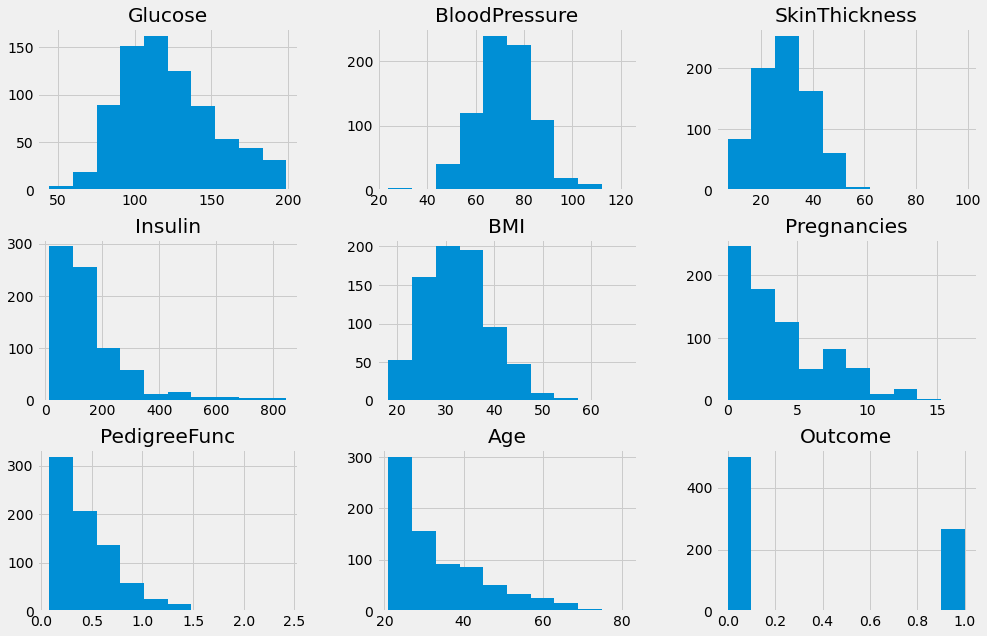

In [24]:
df3.hist(bins=10)

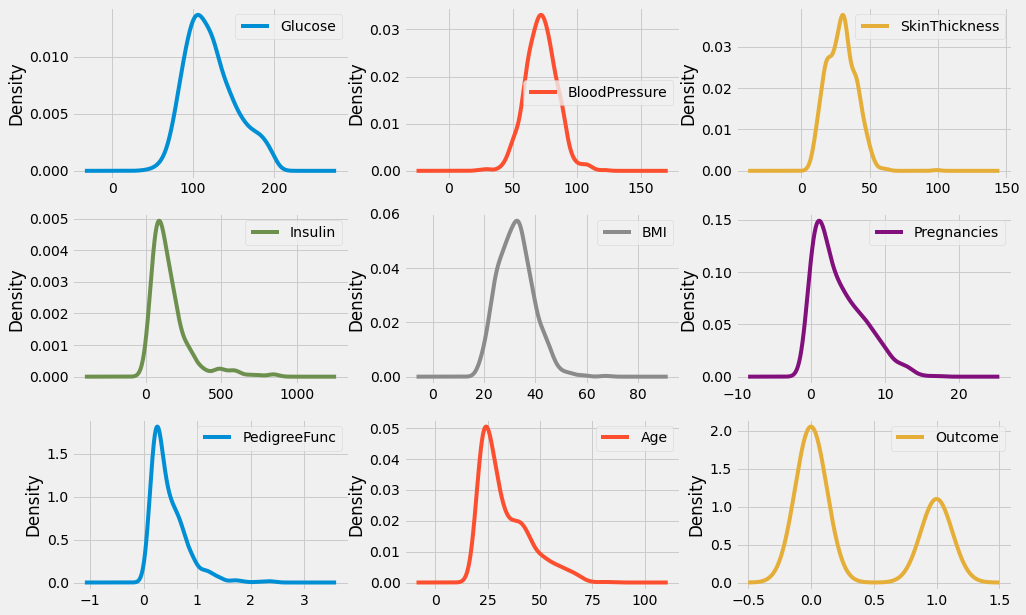

In [25]:
df3.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

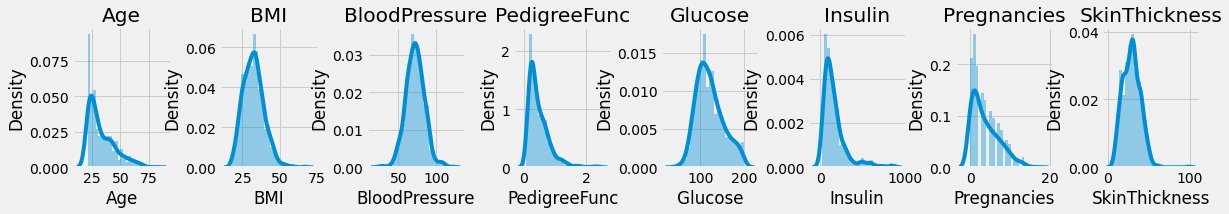

In [26]:
plt.figure(1, figsize=(18, 6))
n = 0
for x in ["Age", "BMI", "BloodPressure", "PedigreeFunc", "Glucose", "Insulin", "Pregnancies", "SkinThickness"]:
  n += 1
  plt.subplot(2, 8, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df3[x], bins=25)
  plt.title(f"{x}")
plt.show()

O boxplot mostra os valores mínimos e máximo, média, mediana e os valores discrepantes do valores normais(outliers)

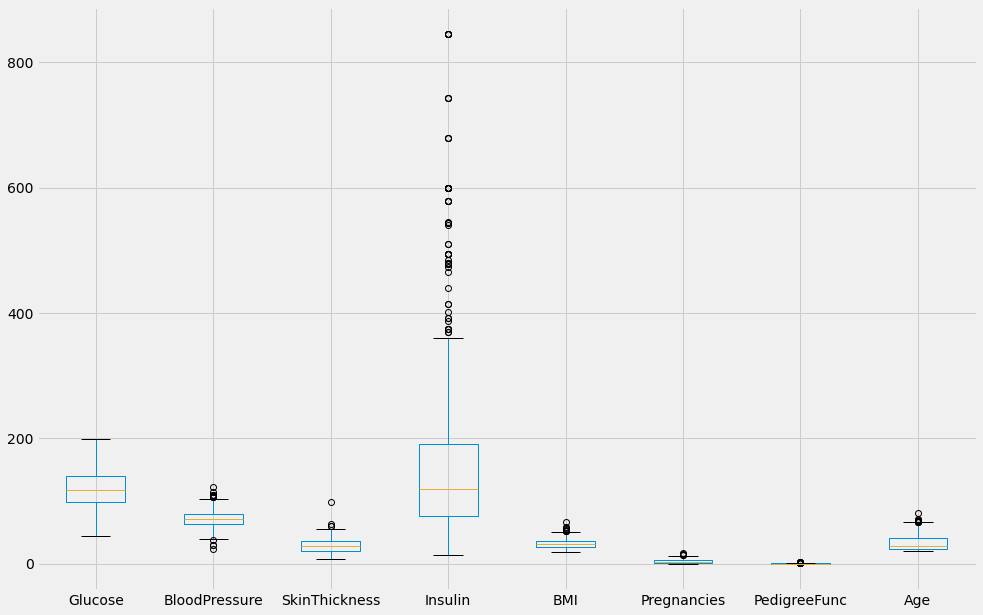

In [27]:
#plt.figure(figsize=(18, 8))
df3.boxplot(column=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pregnancies', 'PedigreeFunc', 'Age'])

Text(0.5, 1.0, 'Distribuição das características dos registros')

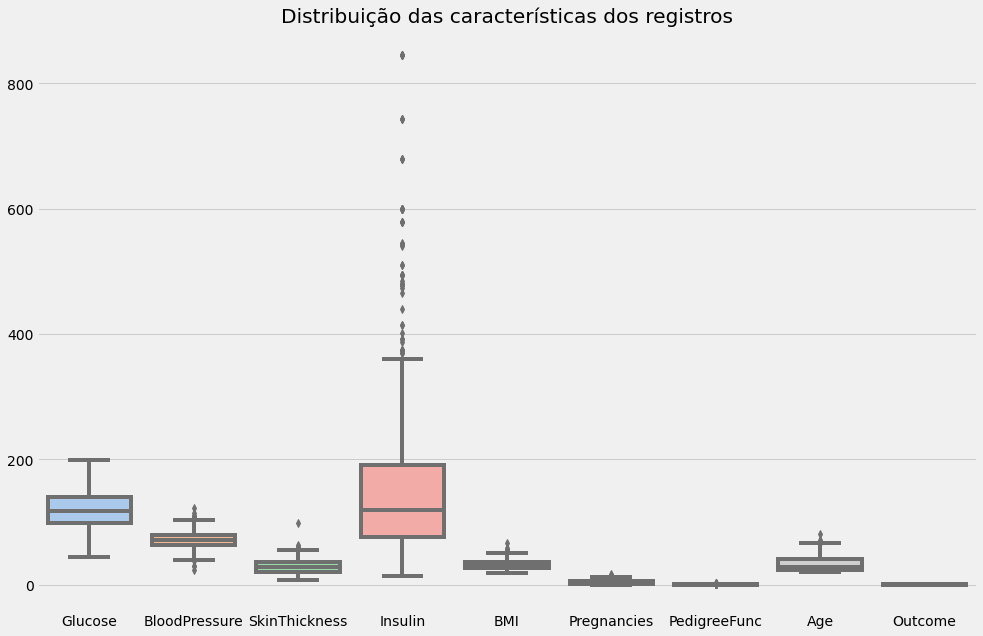

In [28]:
sns.boxplot(data = df3, orient= 'v', palette="pastel")
plt.title("Distribuição das características dos registros")

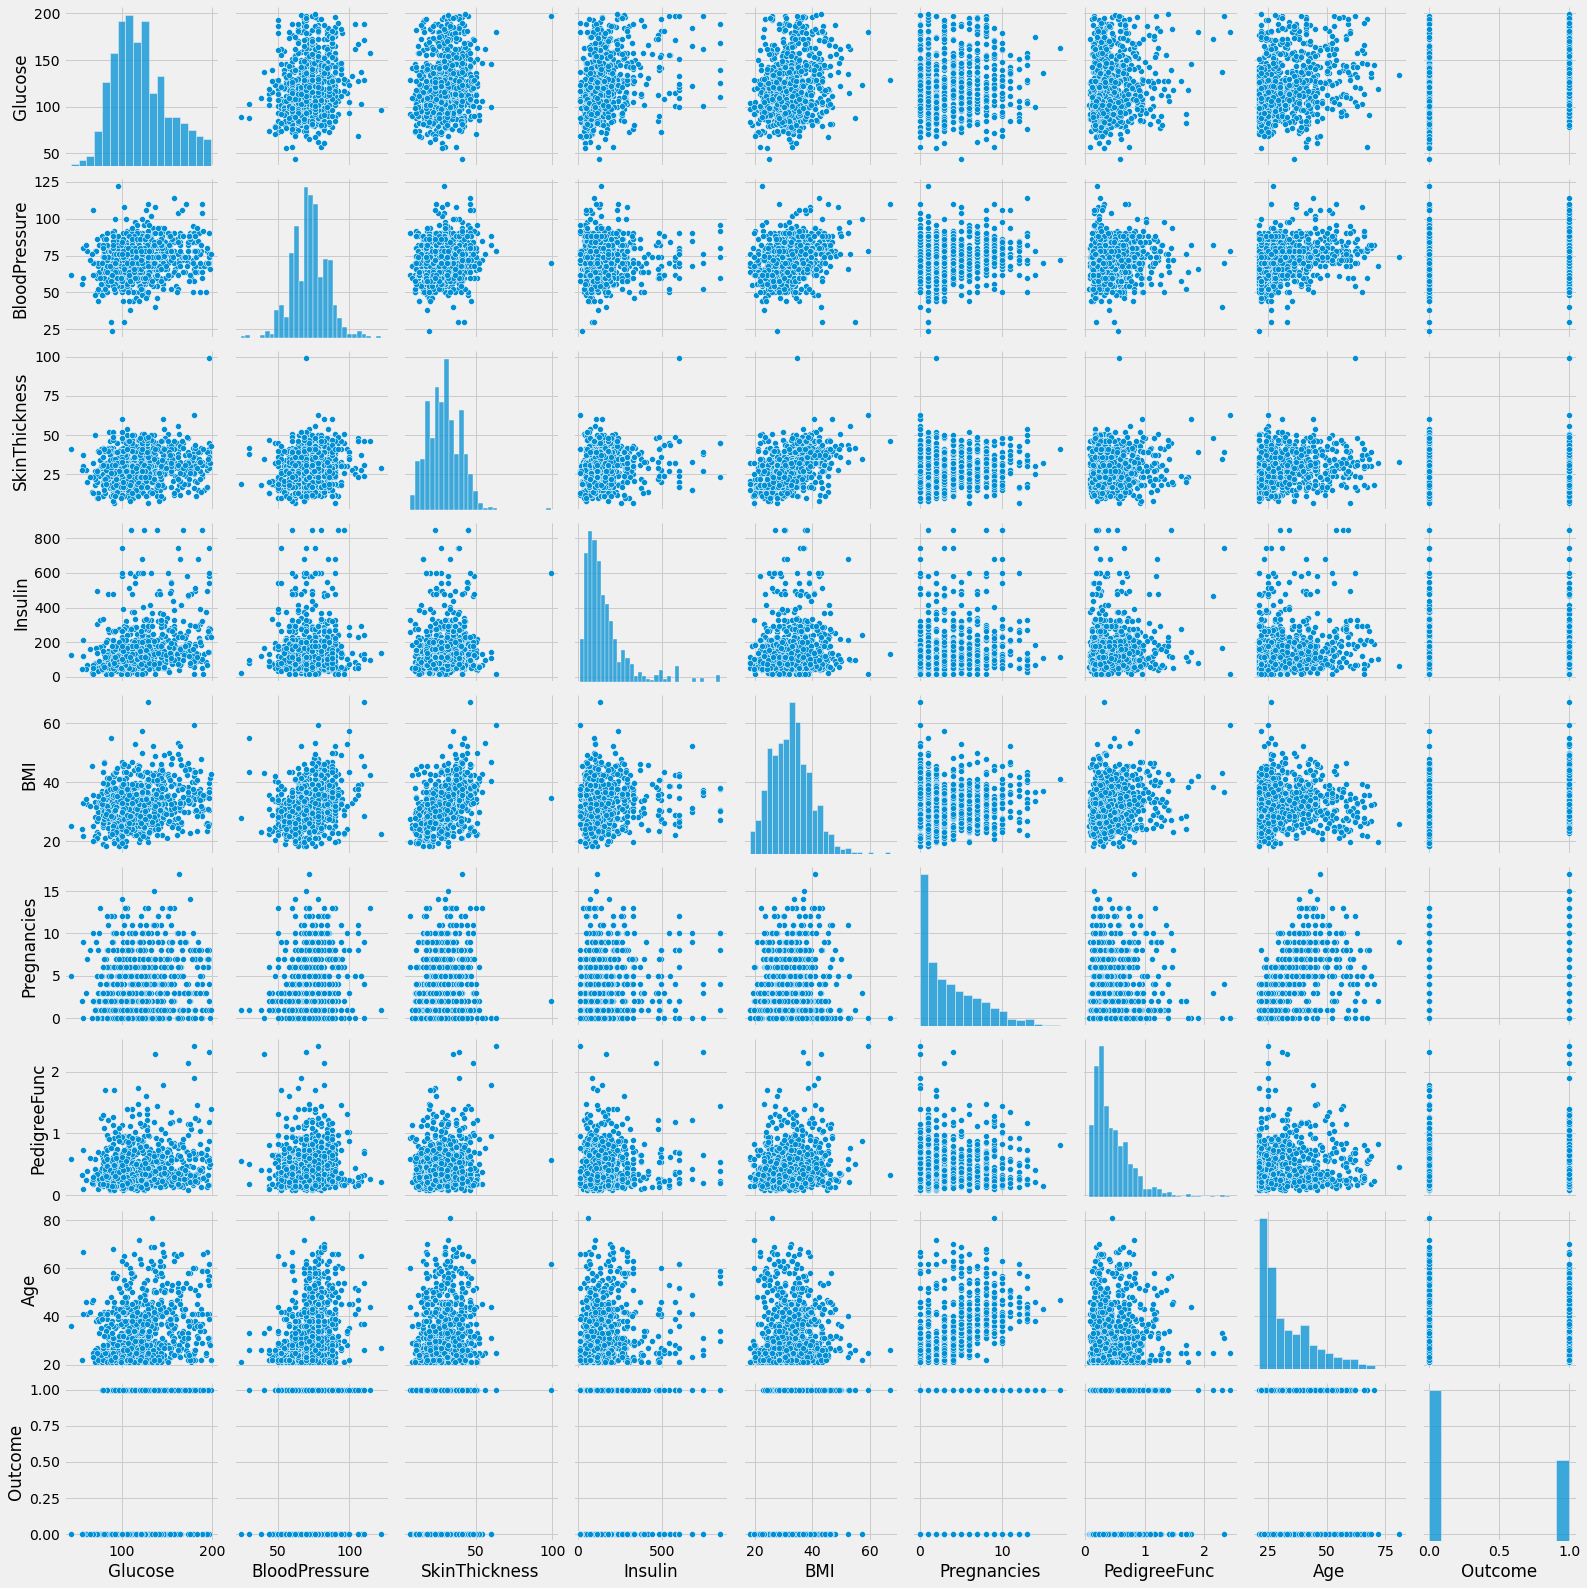

In [29]:
#plt.figure(figsize=(12, 5))
sns.pairplot(df3)

In [30]:
df3.Outcome = df3.Outcome.astype("category")

Este gráfico mostra a relação dos entre as colunas Glucose e Insulin, onde o mais escuro mostra os não diabéticos e o mais claro mostra os diabéticos

In [31]:
fig = px.scatter(df3, x="Glucose", y="Insulin", color="Outcome", title="Relação entre Glicose e Insulina", trendline="ols", 
                 marginal_x="box", labels={"Glucose": "Glicose", "Insulin": "Insulina"})
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Este gráfico mostra a relação entre a taxa de glicose e a idade da pessoa, onde as informaçoes mais escuras são de não diabéticos e o mais claro de diabéticos

In [32]:
fig = px.scatter(df3, x="Glucose", y="Age", color="Outcome", title="Relação entre Glicose e idade", trendline="ols", 
                 marginal_x="box", labels={"Glucose": "Glicose", "Age": "Idade"})
fig.show()

Agora, a relação por idade e nível de insulina

In [33]:
fig = px.scatter(df3, x="Insulin", y="Age", color="Outcome", title="Distribuição por Taxa de Insulina e Idade", trendline="ols", 
                 marginal_x="box", labels={"Insulin": "Insulina", "Age": "Idade"})
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



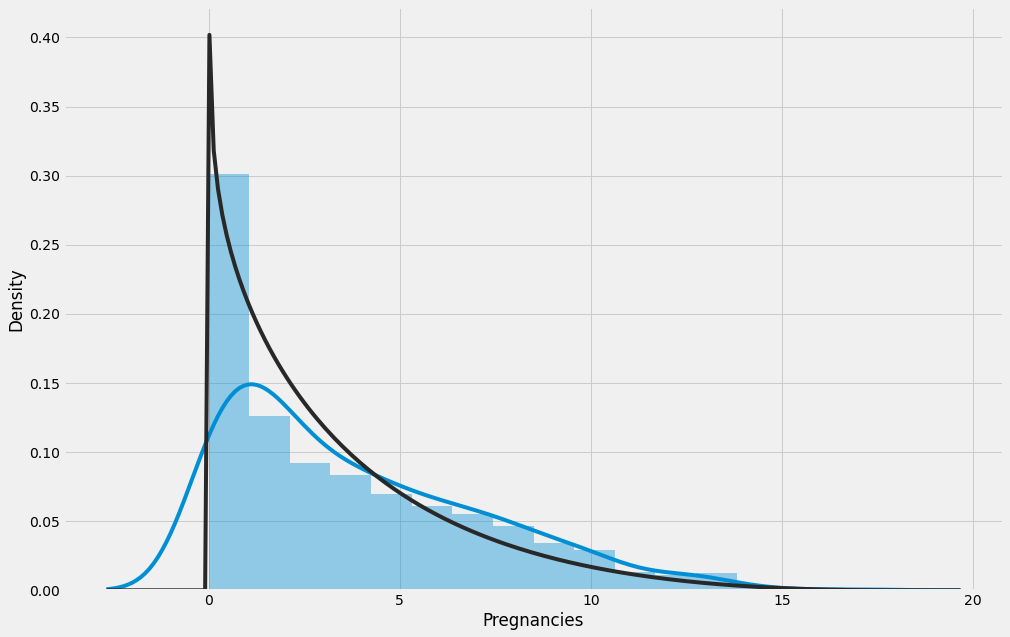

In [34]:
from scipy import stats
sns.distplot(df3.Pregnancies, fit= stats.gausshyper)

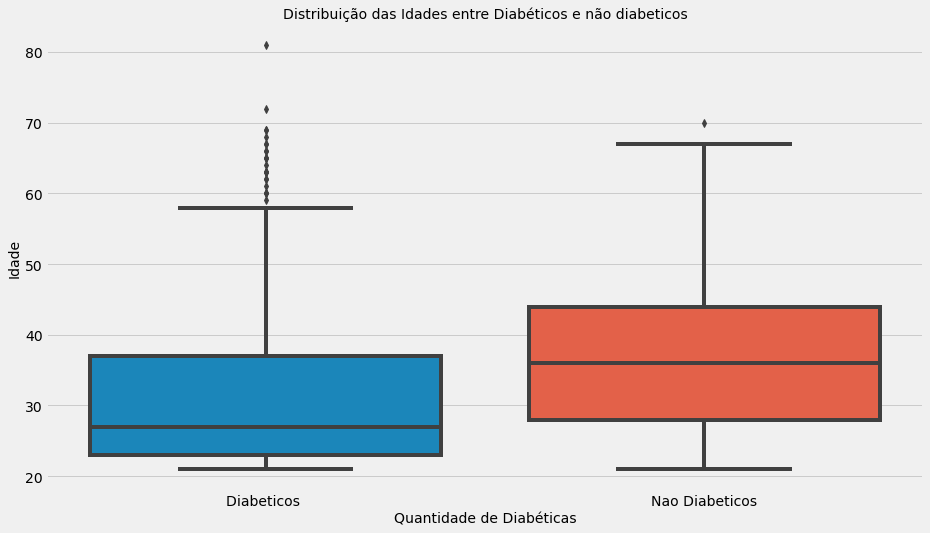

In [35]:
ax = sns.boxplot(x="Outcome", y="Age", data=df3)

ax.figure.set_size_inches(14, 8)
ax.set_title("Distribuição das Idades entre Diabéticos e não diabeticos", fontsize=14)
ax.set_xlabel("Quantidade de Diabéticas", fontsize= 14)
ax.set_ylabel("Idade", fontsize = 14)
ax.set_xticklabels(["Diabeticos ", "Nao Diabeticos"], fontsize=14)
ax

# Criação do modelo de Machine Learning

Documentação do Scikit-learn
https://scikit-learn.org/stable/user_guide.html

Usando um mapa de calor usando o Seaborn para verificar a correlação entre as colunas, sendo que 1 determina uma correlaçao perfeita, -1 a anti correlação perfeita e 0 mostra que não tem correlação nenhuma

Text(0.5, 1.0, 'Correlação entre as características')

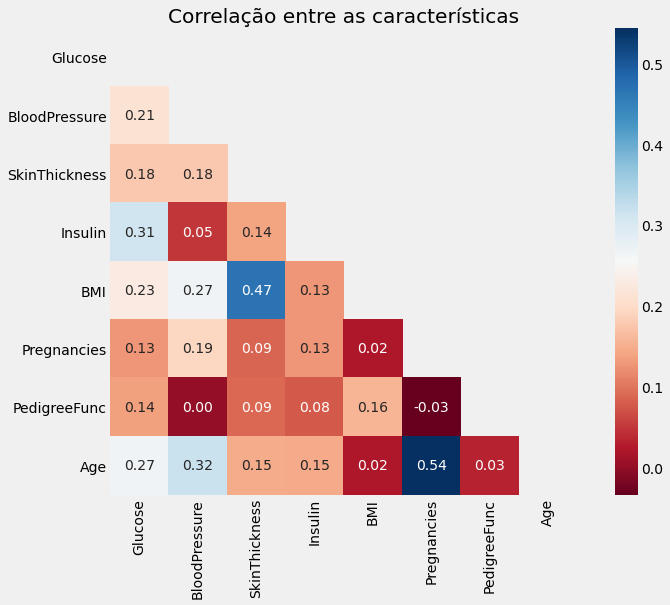

In [36]:
df_correlacao = df3.corr()

mask = np.triu(np.ones_like(df_correlacao, dtype=np.bool))
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_correlacao, annot=True, cmap='RdBu', fmt='.2f', mask=mask, square=True, linecolor="white")
heatmap.set_title("Correlação entre as características")

Separando as features

In [37]:
x = df3.drop(["Outcome"], axis=1, inplace=False)
y = df3["Outcome"]

Normalizando os dados

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(x)
colunas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pregnancies', 'PedigreeFunc', 'Age']
X = pd.DataFrame(X)
X.columns = colunas

# Este ação age como o MinMaxScaler
# X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [39]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,PedigreeFunc,Age
0,0.670968,0.489796,0.304348,0.096154,0.314928,0.352941,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.096154,0.171779,0.058824,0.116567,0.166667
2,0.896774,0.408163,0.239130,0.096154,0.104294,0.470588,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.058824,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.000000,0.943638,0.200000


Separando os dados de teste e de treino

In [40]:
"""
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)
"""

# verificar o modelo usando o pacote cross validation
# O cross validation funciona de forma diferente do train test split, ele já treina e testa o modelo
# Exemplo:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
num_folds = 10 #>> numero folds da validação cruzada
num_instances = len(X) #>> numeor de instancias
seed = 7 #>> numero do seed garante que o resultado seja sempre o mesmo
#kfold = cross_validate.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
# modelo = ? >> chama o modelo de ML
# resultado cross_validation.cross_val_score(modelo, X, y, cv = kfold) >> cv siginifca a metrica para avaliar o modelo >> cross_val_score treina e testa o modelo

# Feature Selection

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

teste = SelectKBest(score_func = chi2, k=5)
fit = teste.fit(X,y)

print(fit.scores_)
features = fit.transform(X)

features = pd.DataFrame(features)
print(features)

[14.29479629  0.58694153  1.17492584  3.80262238  5.03536739  6.5599818
  2.75858391  8.20569067]
            0         1         2         3         4
0    0.670968  0.096154  0.314928  0.352941  0.483333
1    0.264516  0.096154  0.171779  0.058824  0.166667
2    0.896774  0.096154  0.104294  0.470588  0.183333
3    0.290323  0.096154  0.202454  0.058824  0.000000
4    0.600000  0.185096  0.509202  0.000000  0.200000
..        ...       ...       ...       ...       ...
763  0.367742  0.199519  0.300613  0.588235  0.700000
764  0.503226  0.117788  0.380368  0.117647  0.100000
765  0.496774  0.117788  0.163599  0.294118  0.150000
766  0.529032  0.117788  0.243354  0.058824  0.433333
767  0.316129  0.117788  0.249489  0.058824  0.033333

[768 rows x 5 columns]


In [42]:
#features2 = pd.Series(fit.transform(X))#, index=X.columns)
#features2

# Decision Tree Classifier

Árvores de decisão (DecisionTrees) são um método de aprendizado supervisionado não paramétrico usado para classificação e regressão . O objetivo é criar um modelo que preveja o valor de uma variável de destino, aprendendo regras de decisão simples inferidas dos recursos de dados.

Algumas vantagens das árvores de decisão:


*   Simples de entender e interpertar. As Arvores podem ser visualizadas
*   Requer pouca preparação dos dados. Outros algoritmos geralmente requerem noramlização dos dados, novas variáveis precisa ser criadas e valores nulos devem ser removidos, pois este algoritmos não suporta valores ausentes.
*   Capaz de lidar com dados numeéricos e categóricos. Alguns algoritmos são especianlizados na aálise de conjuntos de dados que possuem apenas um tipo de dado.
*   Capaz de lidar com problemas de múltiplas sáidas.
*   Possível validar um modelo de testes estatisticos. Isso torna possível levar em conta a confiabilidade do modelo.
*   Apresenta um bom desempenho mesmo que suas suposições sejam violadas de alguma forma pelo modelo verdadeiro a partir do qual os dados foram gerados.

Entre as desvantagens estão:

*   O aprendizado pela árvore de decisão pode criar árvores excessivamente complexas que não generalizam bem os dados. Isso é chamado de overfiting. Mecaninsmos como poda, definir o número mínimo de amostras necessárias em um nó folha ou definir a profundidade máxima da árvore são necessários para evitar este problema
*   A árvores de decisão podem ser instáveis porque pequenas variaçãoes nos dados podem resultar na geração de uma árvore completamente diferente. esse problema é mitigado pelo uso de árvores de decisão em um conjunto.
*   Existem conceitos que são dificeis de aprender porque as árvores de decisão não os expressam facilemnte, como problemas com XOR, paridade ou multiplexador.
*   O aprendizado pela árvore de decisão criam árvores tendenciosas se algumas classes dominam. Portanto. é recomendaável equilibrar o conjunto de dados antes de ajustá-lo à árvore de decisão.

https://scikit-learn.org/stable/modules/tree.html

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

arvore = DecisionTreeClassifier()
arvore.fit(x_train, y_train)
result = arvore.predict(x_test)

In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(arvore.score(x_test, y_test))
print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

0.6753246753246753
[[104  47]
 [ 28  52]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.73       151
           1       0.53      0.65      0.58        80

    accuracy                           0.68       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.70      0.68      0.68       231



Features mais importantes para o modelo

In [45]:
arvore.feature_importances_

array([0.32864482, 0.07626928, 0.05423777, 0.11863226, 0.16929725,
       0.0479584 , 0.09954987, 0.10541035])

In [46]:
feature_imp = pd.Series(arvore.feature_importances_, index=X.columns)

In [47]:
feature_imp.sort_values(ascending=False)

Glucose          0.328645
BMI              0.169297
Insulin          0.118632
Age              0.105410
PedigreeFunc     0.099550
BloodPressure    0.076269
SkinThickness    0.054238
Pregnancies      0.047958
dtype: float64

Visualizando as Features mai importantes

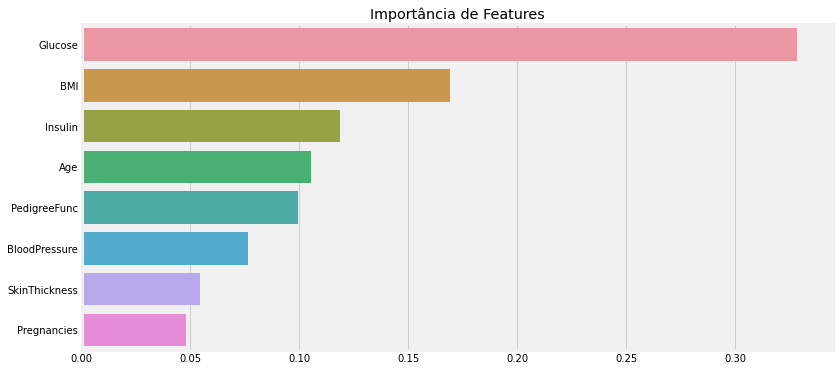

In [125]:
plt.figure(figsize=(12, 6))
feature_imp_sort = feature_imp.sort_values(ascending=False)
sns.barplot(x=feature_imp_sort, y=feature_imp_sort.index)
plt.title("Importância de Features")
plt.show()

Agora que sabemos as features mais importante podemos usar somente algumas delas

In [49]:
X = X.drop(["Pregnancies", "SkinThickness", "BloodPressure"], axis=1)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (537, 5)
x test:  (231, 5)
y train:  (537,)
y test:  (231,)


In [51]:
arvore.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
result_arvore = arvore.predict(x_test)

In [53]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Confusion matrix: \n", confusion_matrix(y_test, result_arvore))
print("\nScore: \n", arvore.score(x_test, y_test))
print("\nClassification Report: \n",metrics.classification_report(y_test, result_arvore))

Confusion matrix: 
 [[106  45]
 [ 35  45]]

Score: 
 0.6536796536796536

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.70      0.73       151
           1       0.50      0.56      0.53        80

    accuracy                           0.65       231
   macro avg       0.63      0.63      0.63       231
weighted avg       0.66      0.65      0.66       231



## K-Nearest Neighbors Classifier (KNN)

Este algoritmos fornece uma funcionalidade para métodos de aprendizagem baseados em vizinhos mais próximos não supervisionados e supervisionados. O aprendizado supervisioando basedado em KNN podem ser usados em dois tipos: classificação para dados com rótulos discretos e regressão para dados com rótulos contínuos.

O princípio por trás dos métodos de vizinhos mais próximos é encontrar um número predefinido de amostras de treinamento mais próximas em distância do novo ponto e prever o rótulo a partir deles. O número de amostras pode ser uma constante definida pelo usuário (aprendizado pelo k-vizinho mais próximo) ou variar com base na densidade local dos pontos (aprendizado de vizinho em raio). A distância pode, em geral, ser qualquer medida métrica: a distância euclidiana padrão é a escolha mais comum. Os métodos baseados em vizinhos mais próximos são cohecidos como métodos de aprendizado de máquina não generalizantes, pois eles simplesmente "lembram" todos os seus dados de treinamento (ppossivelmente transformados em uma estrutura de indexação rápida).

Apesar de sua simplicidade, o algoritmo de vizinhos mais próximos tiveram sucesso em um grande número de problemas de classificação e regressão, incluindo dígits manuscritos e cenas de imagens de satélite. Por ser um método não paramétrico, costuma ser bem sucedido em situações de classificação onde o limite de decisão é muito irregular.

https://scikit-learn.org/stable/modules/neighbors.html#classification

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17, p=12)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=12,
                     weights='uniform')

In [55]:
from sklearn.metrics import classification_report

result_knn = knn.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, result_knn))
print("\nScore: \n", knn.score(x_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, result_knn))

Confusion Matrix:
 [[121  30]
 [ 30  50]]

Score: 
 0.7402597402597403

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



#Redes Neurais (MLPClassifier)

O Multi-layer Perceptron (MLP) é um algoritmo de aprendizado supervisionado que aprende com a função f(.): Rm --> Ro treinando em um conjunto de dados, onde m é o número de dimensões para entrada e o é número de dimensões para saída. Dado um conjunto de recursos X = x1, x2,...xm e um alvo y, ele pode aprender um aproximador de função não linear para classificação ou regressão. É diferente da regressão logística, pois entre a camada de entrada e a de saída pode haver uma ou mais camadas não lineares, chamadas camadas ocultas.

As vantagens do MLP incluem:

*   Capacidade de aprender modelos não lineares.
*   Capacidade de aprender modelos em tempo real (aprendizado on-line) usando partial_fit (treinamento parcial).

As desvantagens do MLP:


*   O MLP com camadas ocultas tem uma função de perda nao convexa onde existe mais de um mínimo local. Portanto, inicializações de peso aleatório diferentes podem levar a uma precisão de validação diferente.
*   O MLP requer  ajuste de varios hiperparâmetros, como o número de neurônios ocultos, camadas e iterações.
*   O MLP é sensível ao dimensionamento de resursos.

O MLPClassifier implementa um algoritmo perceptron multicamadas que treina usando o Backpropagation, masi precisamente, ele treina usando alguma forma de descida do gradiente e os gradientes são calculados usando Backpropagation. Para classificação, ele minimiza a função de perda de entropia cruzada, dando um vetor de estimativas de probabilidade P(y|x) por amostra x.

Além disso, o modelo oferece suporte à classificaçõ de vários rótulos, na qual uma amostra pode pertencer a mais de uma classe. Para cada classe, a saída bruta passa pela função logística. Valores maiores ou iguais a 0.5 são arredondados para 1, caso contrário, para 0. Para uma saída prevista de uma amostra, os índices onde o valor representa as classes atribuídas dessa amostra.


https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [130]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(10, 3, 10), max_iter=1000)
mlp.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 3, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [131]:
result_mlp = mlp.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, result_mlp))
print("\nScore: \n", mlp.score(x_test, y_test))
print("\nClassification Report: \n",classification_report(y_test, result_mlp))

Confusion Matrix:
 [[118  33]
 [ 31  49]]

Score: 
 0.7229437229437229

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       151
           1       0.60      0.61      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



# Suporte Vector Machine (SVM)

Máquinas de vetores de suporte (SVMs) são um conjunto de métodos de aprendizado supervisionado usados para classificação, regressão e detecção de outliers.

Vantagens das SVMs:

*   Eficaz em espaços dimensionais elevados.
*   Ainda efixaz nos casos em que o número de dimensões é maior do que o número de amostras.
*   Usa um subconjunto de pontos de treinaemnto na função de decisão (chamados de vetores de suporte), portanto, também é eficiente em termos de memória.
*   Versátil: diferente funções do Kernel podem ser especificadas para a função de decisão. Kernels comuns são fornecidos, mas também é possível especificar kernels personalizados.

Desvantagens das SVMs

*   Se o número de recursos for muito maior do que o número de amostras, evite o sobreajuste ao escolher as funções do Kernel, pois o termo re regularização é crucial.
*   Os SVMs não fornecem estimativas de probabilidade diretamente, elas são calculadas usando uma validação cruzada quíntupla cara.

https://scikit-learn.org/stable/modules/svm.html#svm-classification

In [59]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
result_svm = svc.predict(x_test)

In [60]:
print("Confusion Matrix:\n", confusion_matrix(y_test, result_svm))
print("\nScore: \n", svc.score(x_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, result_svm))

Confusion Matrix:
 [[122  29]
 [ 35  45]]

Score: 
 0.7229437229437229

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       151
           1       0.61      0.56      0.58        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



# Naive Bayes

Os métodos Naive Bayes são um conjunto de algoritmos de aprendizagem supervisionada baseados na apliação do teoremoa de Bayes com a suposição "ingênua" de independência condicional entre cada par de características dado o valor da variável de classe.

Apesar de suas suposições aparentemente simplificadas demais, os classificadores Naive Bayes funcionaram muito bem em muitas situaçãoes do mundo real, como a famosa classificação de documentos e filtragem de spam. Eles requerem uma pequena quantidade de dados de treinaemnto para estimar os parâmetros necessários.

O aprendizado pelos classifadores Naive Bayes podem ser extremamente rápidos em comparação com métodos mais sofisticados. O desacoplamento das distribuições de características condicionais de classe significa que cada distribuição pode ser estimada independentemente como uma distribuição unidimensional.

In [61]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
result_gnb = gnb.predict(x_test)

In [62]:
print("Confusion Matrix:\n", confusion_matrix(y_test, result_gnb))
print("\nScore: \n", gnb.score(x_test, y_test))
print("\nClassification Report: \n", classification_report(y_test, result_gnb))

Confusion Matrix:
 [[121  30]
 [ 31  49]]

Score: 
 0.7359307359307359

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



# Regressão Logistica

A regressão Logística  modela as prbabilidades de problemas de classificação com dois resultados possíveis. E uma extensão do modelo de regressão linear para problemas de classificação.

O modelo de Regressão Logística usa a função logística para comprimir a saída de uma equação linear entre 0 e 1.



https://christophm.github.io/interpretable-ml-book/logistic.html

In [63]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
result_lr = lr.predict(x_test)

In [64]:
print("Confusion Matrix:\n", confusion_matrix(y_test, result_lr))
print("\nScore: \n", lr.score(x_test, y_test))
print("\nClassification Report: \n", classification_report(y_test, result_lr))

Confusion Matrix:
 [[123  28]
 [ 33  47]]

Score: 
 0.7359307359307359

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



# Random Forest

Uma floresta aleatória é um metaestimador que ajusta vários classificadores de árvore de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e o sobreajuste de controle. O tamanho da amostra é controlado como o parâmetro max_samples se o parâmetro bootstrap for True, caso contrário, todo o conjunto de dados é usado para construir cada árvore.

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=100, bootstrap=True, random_state=0)
rf.fit(x_train, y_train)
result_rf = rf.predict(x_test)

In [66]:
print("Confusion Matrix:\n", confusion_matrix(y_test, result_rf))
print("\nScore: \n", rf.score(x_test, y_test))
print("\nClassification Report: \n", classification_report(y_test, result_rf))

Confusion Matrix:
 [[116  35]
 [ 26  54]]

Score: 
 0.7359307359307359

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       151
           1       0.61      0.68      0.64        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



# Seleção do Modelo Preditivo usando validação cruzada (cross validate)

Ao separar os dados aleatoriamente em dados de treino e de teste, sempre haverá uma variância de resultados, pois a cada separação dos dados podem haver uma aleatoriedade de forma que a cada treinamento poderá apresentar um resultado diferente. 

Para garantir que o resultado seja sempre o mesmo e transmita uma confiaça no resultado obtido, será necessário utilizar a validação cruzada (cross validate), que irá particionar o conjundo de dados em dados de treino e teste diversas vezes, de modo que todo o conjunto de dados passe pelo processo de treinamento e também pelo conjunto de teste. 

Ao fim de diversos treinamentos utilizando a validação cruzada, teremos uma média dos resultados alcançados em todos os treinamentos, podendo assim garantir uma confinça maior no resultado obtido.

In [106]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

# Definindo os valores para o número de folds
num_folds = 5
num_instances = len(X)
seed = 7

# Preparando o modelo

modelos = []
modelos.append(("LogisticRegression", LogisticRegression()))
modelos.append(("DecisionTreeClassifier", DecisionTreeClassifier()))
modelos.append(("KNeigghborsClassifier", KNeighborsClassifier(n_neighbors=17, p=12)))
modelos.append(("MLPClassifier", MLPClassifier(hidden_layer_sizes=(10, 3, 10), max_iter=1000)))
modelos.append(("SuportVectorMachine", SVC()))
modelos.append(("NaiveBayes", GaussianNB()))
modelos.append(("RandomForestClassifier", RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=100, bootstrap=True, random_state=0)))

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
   kfold = KFold(n_splits = num_folds, shuffle=True, random_state = seed)
   cv_results = cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')
   resultados.append(cv_results)
   nomes.append(nome)
   msg = "%s - Acurácia: %f, Desvio Padrão: %f" % (nome, cv_results.mean(), cv_results.std())
   print(msg)

LogisticRegression - Acurácia: 0.766853, Desvio Padrão: 0.032066
DecisionTreeClassifier - Acurácia: 0.700560, Desvio Padrão: 0.040315
KNeigghborsClassifier - Acurácia: 0.774654, Desvio Padrão: 0.045222
MLPClassifier - Acurácia: 0.773372, Desvio Padrão: 0.024402
SuportVectorMachine - Acurácia: 0.765546, Desvio Padrão: 0.036692
NaiveBayes - Acurácia: 0.759104, Desvio Padrão: 0.023067
RandomForestClassifier - Acurácia: 0.749970, Desvio Padrão: 0.031419


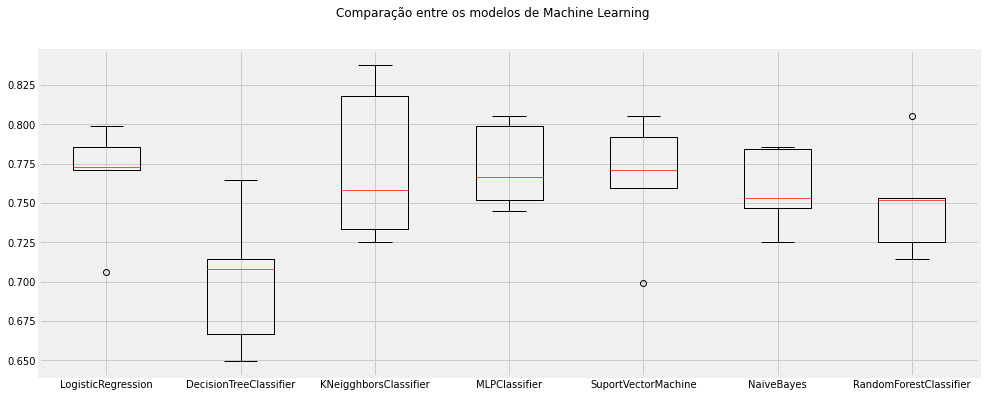

In [107]:
# Boxplot para comparar os algoritmos
fig = plt.figure(figsize = (15, 6))
fig.suptitle("Comparação entre os modelos de Machine Learning")
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [108]:
#Resultados dos treinamentos obtidos em cada rodada da validação cruzada
resultados

[array([0.77272727, 0.78571429, 0.7987013 , 0.70588235, 0.77124183]),
 array([0.70779221, 0.64935065, 0.71428571, 0.66666667, 0.76470588]),
 array([0.83766234, 0.73376623, 0.81818182, 0.7254902 , 0.75816993]),
 array([0.7987013 , 0.76623377, 0.80519481, 0.74509804, 0.75163399]),
 array([0.79220779, 0.75974026, 0.80519481, 0.69934641, 0.77124183]),
 array([0.75324675, 0.74675325, 0.78571429, 0.7254902 , 0.78431373]),
 array([0.75324675, 0.71428571, 0.80519481, 0.75163399, 0.7254902 ])]

In [109]:
# transformando esses resultados em um Dataframe
df_resultado = pd.DataFrame(resultados, columns=["Resultado1", "Resultado2", "Resultado3", "Resultado4", "Resultado5"])

In [110]:
df_resultado

,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5
0,0.772727,0.785714,0.798701,0.705882,0.771242
1,0.707792,0.649351,0.714286,0.666667,0.764706
2,0.837662,0.733766,0.818182,0.725490,0.758170
3,0.798701,0.766234,0.805195,0.745098,0.751634
4,0.792208,0.759740,0.805195,0.699346,0.771242
5,0.753247,0.746753,0.785714,0.725490,0.784314
6,0.753247,0.714286,0.805195,0.751634,0.725490


In [111]:
# nomes dos algoritmos testados
nomes

['LogisticRegression',
 'DecisionTreeClassifier',
 'KNeigghborsClassifier',
 'MLPClassifier',
 'SuportVectorMachine',
 'NaiveBayes',
 'RandomForestClassifier']

In [112]:
# tranformando os nomes dos algoritmos em um Dataframe
df_nomes = pd.DataFrame(nomes, columns=["Nomes"])

In [113]:
df_nomes

,Nomes
0,LogisticRegression
1,DecisionTreeClassifier
2,KNeigghborsClassifier
3,MLPClassifier
4,SuportVectorMachine
5,NaiveBayes
6,RandomForestClassifier


In [115]:
# Agora podemos juntar o Dataframe de nomes e os resultados após cada treinamento
nome_resultado = pd.concat([df_nomes, df_resultado], axis=1)

In [116]:
nome_resultado

,Nomes,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5
0,LogisticRegression,0.772727,0.785714,0.798701,0.705882,0.771242
1,DecisionTreeClassifier,0.707792,0.649351,0.714286,0.666667,0.764706
2,KNeigghborsClassifier,0.837662,0.733766,0.818182,0.725490,0.758170
3,MLPClassifier,0.798701,0.766234,0.805195,0.745098,0.751634
4,SuportVectorMachine,0.792208,0.759740,0.805195,0.699346,0.771242
5,NaiveBayes,0.753247,0.746753,0.785714,0.725490,0.784314
6,RandomForestClassifier,0.753247,0.714286,0.805195,0.751634,0.725490


In [117]:
# Criando uma coluna com a media dos resultados obtidos em cada treinamento
nome_resultado["Media"] = (nome_resultado["Resultado1"]+ nome_resultado["Resultado2"]+ nome_resultado["Resultado3"]+ nome_resultado["Resultado4"]+ nome_resultado["Resultado5"]) / 5

In [118]:
nome_resultado.sort_values(by="Media", ascending=False)

,Nomes,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5,Media
2,KNeigghborsClassifier,0.837662,0.733766,0.818182,0.725490,0.758170,0.774654
3,MLPClassifier,0.798701,0.766234,0.805195,0.745098,0.751634,0.773372
0,LogisticRegression,0.772727,0.785714,0.798701,0.705882,0.771242,0.766853
4,SuportVectorMachine,0.792208,0.759740,0.805195,0.699346,0.771242,0.765546
5,NaiveBayes,0.753247,0.746753,0.785714,0.725490,0.784314,0.759104
6,RandomForestClassifier,0.753247,0.714286,0.805195,0.751634,0.725490,0.749970
1,DecisionTreeClassifier,0.707792,0.649351,0.714286,0.666667,0.764706,0.700560


Text(0.5, 1.0, 'Média da acurácia alcançada usando cross validate')

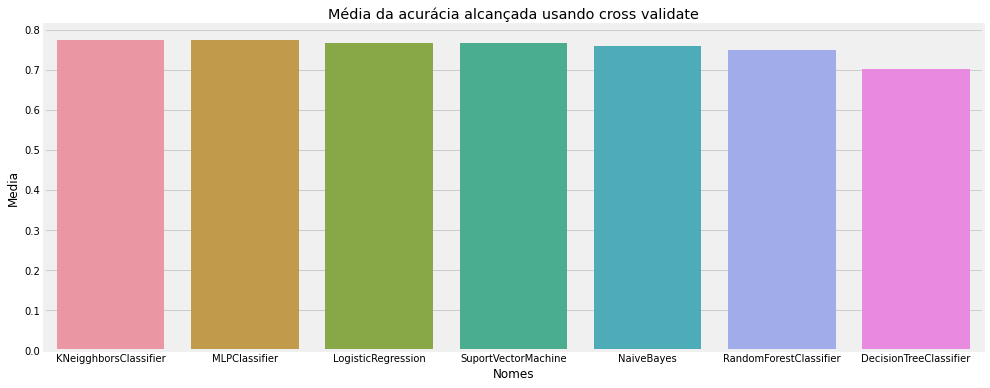

In [119]:
fig = plt.figure(figsize = (15, 6))
sns.barplot(x="Nomes", y="Media", data=nome_resultado.sort_values(by="Media", ascending=False))
plt.title("Média da acurácia alcançada usando cross validate")

# Comparando o score de todos os algoritmos:

In [120]:
print("Decision Tree:      ", arvore.score(x_test, y_test), "cross_validate: ", cross_val_score(arvore, X, y, cv = kfold, scoring = 'accuracy').mean())

print("KNN:                ", knn.score(x_test, y_test), "cross_validate: ", cross_val_score(knn, X, y, cv = kfold, scoring = 'accuracy').mean())

print("MLPClassifier:      ", mlp.score(x_test, y_test), "cross_validate: ", cross_val_score(mlp, X, y, cv = kfold, scoring = 'accuracy').mean())

print("SVM:                ", svc.score(x_test, y_test), "cross_validate: ", cross_val_score(svc, X, y, cv = kfold, scoring = 'accuracy').mean())

print("Naive Bayes:        ", gnb.score(x_test, y_test), "cross_validate: ", cross_val_score(gnb, X, y, cv = kfold, scoring = 'accuracy').mean())

print("Logistic Regression:", lr.score(x_test, y_test), "cross_validate: ", cross_val_score(lr, X, y, cv = kfold, scoring = 'accuracy').mean())

print("Random Forest:      ", rf.score(x_test, y_test), "cross_validate: ", cross_val_score(rf, X, y, cv = kfold, scoring = 'accuracy').mean())

Decision Tree:       0.658008658008658 cross_validate:  0.7005262711145064
KNN:                 0.70995670995671 cross_validate:  0.7746541040658688
MLPClassifier:       0.7229437229437229 cross_validate:  0.7681521093285799
SVM:                 0.7229437229437229 cross_validate:  0.7655462184873949
Naive Bayes:         0.7359307359307359 cross_validate:  0.7591036414565826
Logistic Regression: 0.7359307359307359 cross_validate:  0.7668534080298787
Random Forest:       0.7359307359307359 cross_validate:  0.7499702911467618


In [121]:
print("Confusion Matrix")
print("Decision Tree:\n", confusion_matrix(y_test, result_arvore))
print("KNN:\n", confusion_matrix(y_test, result_knn))
print("MLPClssifier:\n", confusion_matrix(y_test, result_mlp))
print("SVM:\n", confusion_matrix(y_test, result_svm))
print("Naive Bayes:\n", confusion_matrix(y_test, result_gnb))
print("Logistic Regression: \n", confusion_matrix(y_test, result_lr))
print("Random Forest: \n", confusion_matrix(y_test, result_rf))

Confusion Matrix
Decision Tree:
 [[106  45]
 [ 35  45]]
KNN:
 [[121  30]
 [ 30  50]]
MLPClssifier:
 [[119  32]
 [ 32  48]]
SVM:
 [[122  29]
 [ 35  45]]
Naive Bayes:
 [[121  30]
 [ 31  49]]
Logistic Regression: 
 [[123  28]
 [ 33  47]]
Random Forest: 
 [[116  35]
 [ 26  54]]


# Verificando o tempo de treinamento dos algoritmos

In [122]:
import timeit
%timeit arvore.fit(x_train, y_train)
%timeit gnb.fit(x_train, y_train)
%timeit lr.fit(x_train, y_train)
%timeit knn.fit(x_train, y_train)
%timeit mlp.fit(x_train, y_train)
%timeit svc.fit(x_train, y_train)
%timeit rf.fit(x_train, y_train)

100 loops, best of 3: 2.12 ms per loop
1000 loops, best of 3: 585 µs per loop
100 loops, best of 3: 2.62 ms per loop
1000 loops, best of 3: 683 µs per loop
1 loop, best of 3: 910 ms per loop
100 loops, best of 3: 7.99 ms per loop
1 loop, best of 3: 474 ms per loop


# Conclusão

De acordo com os testes realizados em diversos algoritmos o NeighborsClassifier (KNN) teve um melhor desempenho, alcançando uma acurácia de 77%, seguido pelo Regressão Logísitca, o Suport Vector Machine (SVM) e o MLP Classifier com 76% de acurácia. Outros algoritmos tiveram um bom desempenho também porém um pouco abaixo dos demais, como o Naive Bayes que obteve uma acurácia de 75%, Random Forest com 74% e Decision Tree Classifier co 68%.

Quanto ao desempenho no tempo de treinamento o algoritimo que apresentou um memor tempo para execução foi o Naive Bayes com 494 microsegundos para cada loop, seguido pelo knn que gastou 592 microsegundos para cada loop, depois o algoritimo de arvore de decisão que gastou 2.05 milisegundos para o treinamento, o de regressão logisitica que gastou 2.51 milisegundos, o svm gastou 7.81 milisegundos, enquanto o random forest gastou bem mais tempo pois são diversas arvores de decisão com 475 milisegundos e o mlp Classifier que após 1000 iterações não convergiu, concluido o treinamento após 915 milisegundos.